In [1]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob

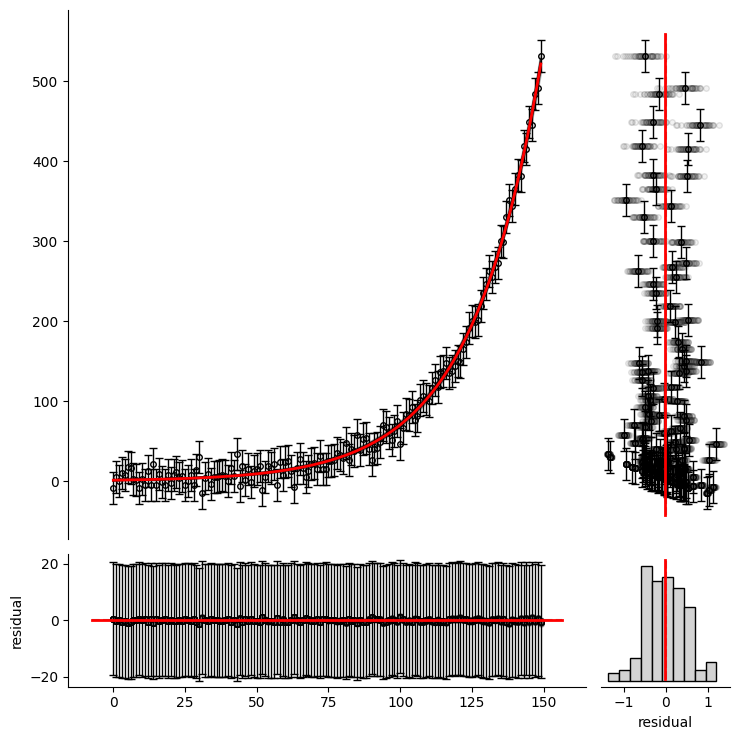

In [3]:
%matplotlib inline
import numpy as np
import dataprob

# ------------------------------------------------------------------------
# Define model and generate data

def lagged_exponential(k=0.1,lag=5,t=None):
    return np.exp(k*(t + lag))

gen_params = {"k":1/20,
              "lag":5}

err = 10
num_points = 150

t = np.linspace(0,120,num_points)
y_obs = lagged_exponential(t=t,**gen_params) + np.random.normal(0,err,num_points)
y_std = 2*err

test_fcn = lagged_exponential
non_fit_kwargs = {"t":t}

# ------------------------------------------------------------------------
# Run analysis

f = dataprob.setup(some_function=test_fcn,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)

f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f)


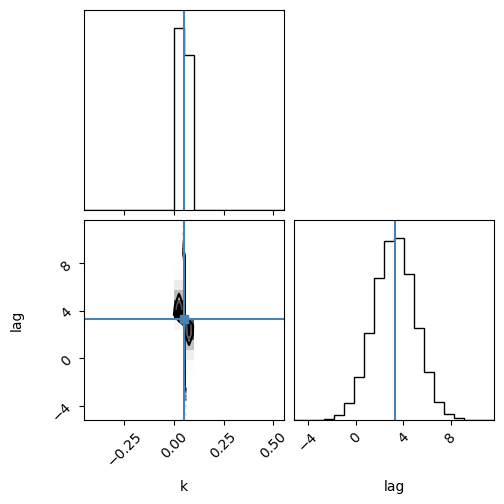

In [4]:
fig = dataprob.plot_corner(f)


In [5]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
k,k,0.050754,0.000772,0.049229,0.052280,0.1,False,-inf,inf,NaN,NaN
lag,lag,3.269171,1.737567,-0.164668,6.703009,5.0,False,-inf,inf,NaN,NaN
